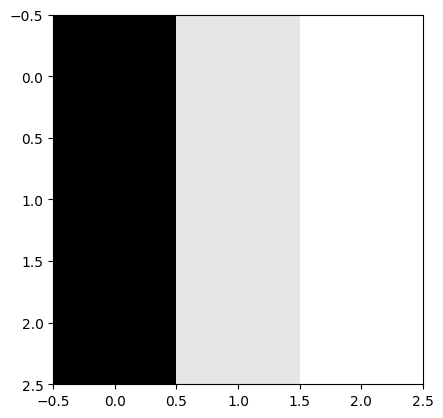

In [2]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt

# 이미지 생성
image = tf.constant([[[[0], [0.9], [1]],
                      [[0], [0.9], [1]],
                      [[0], [0.9], [1]]]], dtype=np.float32)
# 이미지 출력
plt.imshow(image.numpy().reshape(3,3), cmap='gray')
plt.show()


weight.shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)


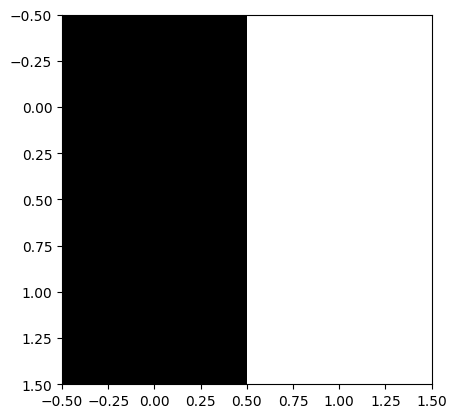

In [3]:

# 가중치 정의
weight = np.array([[[[1.]], [[1.]]], 
                   [[[1.]], [[1.]]]])
print("weight.shape", weight.shape) 
# 가중치 형태 출력
weight_init = tf.constant_initializer(weight)

# 컨볼루션 실행
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
# 컨볼루션 결과 형태 출력

# 결과 출력
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')
plt.show()


(528, 559)


C:\Users\IPMSLab\AppData\Local\Temp\ipykernel_23744\3514812593.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread('cat.jpg')


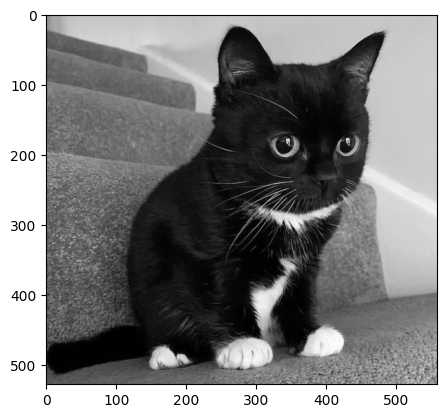

conv2d.shape (1, 528, 559, 1)


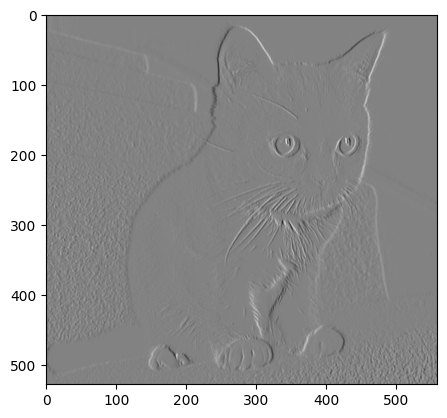

In [4]:
import numpy as np
from imageio import imread, imsave
from skimage import color
import matplotlib.pyplot as plt

img = imread('cat.jpg')
img_gray = color.rgb2gray(img)
print(img_gray.shape)
plt.imshow(img_gray, cmap='gray')
plt.show()
# 가중치 정의
weight = np.array([[[[-1.]], [[0.]], [[1.]]], 
                   [[[-1.]], [[0.]] , [[1.]]], 
                   [[[-1.]], [[0.]] , [[1.]]]])
weight_init = tf.constant_initializer(weight)

# 컨볼루션 실행
img_gray2 =np.reshape(img_gray, (1,*img_gray.shape,1))
conv2d = keras.layers.Conv2D(filters=1, kernel_size=3, padding='same', kernel_initializer=weight_init)(img_gray2)
print("conv2d.shape", conv2d.shape)

# 결과 출력
plt.imshow(conv2d.numpy().reshape(img_gray.shape), cmap='gray')
plt.show()



image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d.shape (1, 3, 3, 3)
[[1.8 3.8 2. ]
 [1.8 3.8 2. ]
 [0.9 1.9 1. ]]
[[18. 38. 20.]
 [18. 38. 20.]
 [ 9. 19. 10.]]
[[-1.8 -3.8 -2. ]
 [-1.8 -3.8 -2. ]
 [-0.9 -1.9 -1. ]]


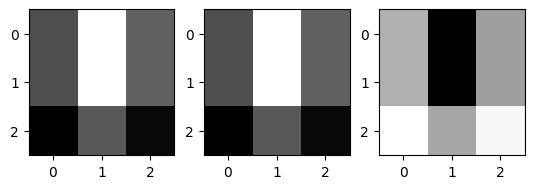

In [5]:
print("image.shape", image.shape)

# 다중 필터 가중치 정의
weight = np.array([[[[1., 10., -1.]], [[1., 10., -1.]]], 
                   [[[1., 10., -1.]], [[1., 10., -1.]]]])
print("weight.shape", weight.shape)  # 다중 필터 가중치 형태 출력
weight_init = tf.constant_initializer(weight)

# 다중 필터 컨볼루션 실행
conv2d = keras.layers.Conv2D(filters=3, kernel_size=2, padding='SAME', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)  # 다중 필터 컨볼루션 결과 형태 출력

# 다중 필터 결과 출력
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1, 3, i+1)
    plt.imshow(feature_map.reshape(3,3), cmap='gray')
    print(feature_map.reshape(3,3))  # 각 필터 결과 출력
plt.show()


C:\Users\IPMSLab\AppData\Local\Temp\ipykernel_23744\1197013742.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread('cat.jpg')


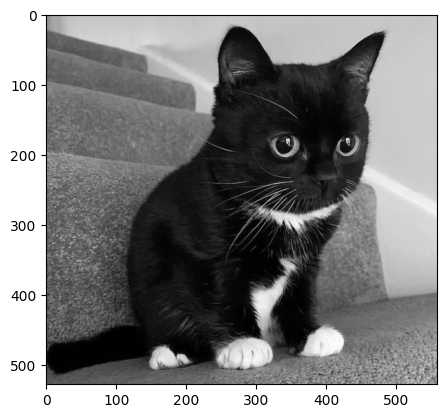

(1, 528, 559, 1)
(1, 264, 279, 1)


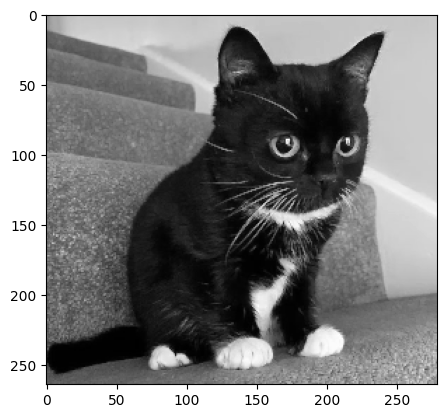

In [6]:
import numpy as np
from imageio import imread, imsave
from skimage import color
import matplotlib.pyplot as plt

img = imread('cat.jpg')
img_gray = color.rgb2gray(img)

plt.imshow(img_gray, cmap='gray')
plt.show()

img_gray2 =np.reshape(img_gray, (1,*img_gray.shape,1))
print(img_gray2.shape)
pool = keras.layers.MaxPool2D(pool_size=(2, 2))(img_gray2)
print(pool.shape)  # MaxPooling 결과의 형태 출력

plt.imshow(pool.numpy().reshape((pool.shape[1], pool.shape[2])), cmap='gray')
plt.show()


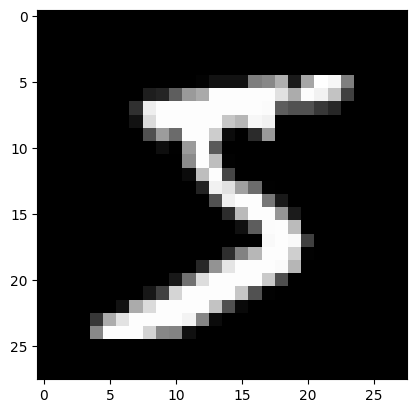

(1, 14, 14, 5)


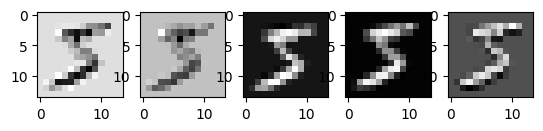

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# MNIST 데이터셋 불러오기
#mnist = tf.keras.datasets.mnist
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

mnist_train = np.loadtxt('mnist_train.csv',delimiter =',')
y_train = mnist_train[:,0]
X_train = np.reshape(mnist_train[:,1:],(60000,28,28))
mnist_test = np.loadtxt('mnist_test.csv',delimiter =',')
y_test = mnist_test[:,0]
X_test = np.reshape(mnist_test[:,1:],(10000,28,28))

X_train = X_train.astype(np.float32) / 255.0
x_test = X_test.astype(np.float32) / 255.0

# 첫 번째 학습 이미지 출력
img = X_train[0]
plt.imshow(img, cmap='gray')
plt.show()

# 이미지 형태 변환 및 텐서 변환
img = img.reshape(-1, 28, 28, 1)
img = tf.convert_to_tensor(img)


# Conv2D 적용
weight_init = keras.initializers.RandomNormal(stddev=0.01)
conv2d = keras.layers.Conv2D(filters=5, kernel_size=3, strides=(2, 2), padding="SAME", 	kernel_initializer=weight_init)(img)
print(conv2d.shape)  # Conv2D 결과의 형태 출력

# Conv2D 결과 시각화
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1, 5, i+1)
    plt.imshow(feature_map.reshape(14, 14), cmap='gray')
plt.show()



(1, 7, 7, 5)


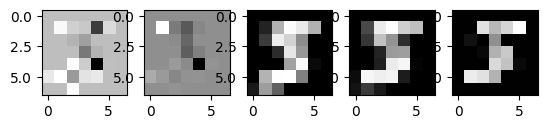

In [8]:
# MaxPooling 적용
pool = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')(conv2d)
print(pool.shape)  # MaxPooling 결과의 형태 출력

# MaxPooling 결과 시각화
feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1, 5, i+1)
    plt.imshow(feature_map.reshape(7, 7), cmap='gray')
plt.show()


(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


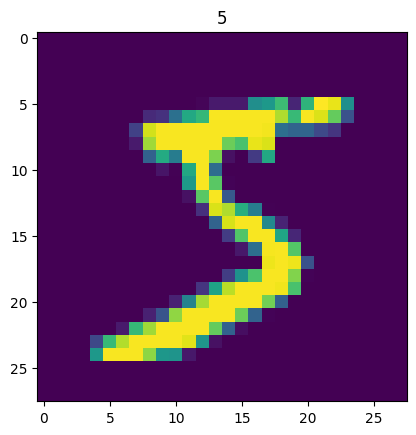

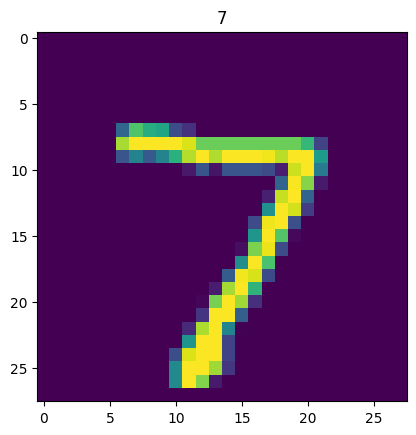

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
# 하이퍼파라미터 설정
learning_rate = 0.001
training_epochs = 5
batch_size = 100
num_models = 1
tf.random.set_seed(0)

# MNIST 데이터셋 로드
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 이미지 정규화: [0, 1] 범위
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

# 이미지 차원 확장 (모델에 맞추기 위해)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# 레이블을 원-핫 인코딩 벡터로 변환
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# TensorFlow 데이터셋 생성: 배치 처리 및 셔플링 용이성
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(buffer_size=500000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

# 데이터셋의 형태 출력
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

# 트레이닝 세트의 첫 번째 이미지 시각화
plt.imshow(train_images[0])
plt.title(f"{np.argmax(train_labels[0])}")
plt.show()

# 테스트 세트의 첫 번째 이미지 시각화
plt.imshow(test_images[0])
plt.title(f"{np.argmax(test_labels[0])}")
plt.show()



In [13]:
model = keras.Sequential()
# 첫 번째 합성곱 레이어
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='SAME', input_shape=(28, 28, 1 ), kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model.add(keras.layers.MaxPool2D(padding='SAME'))
# 두 번째 합성곱 레이어
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='SAME', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model.add(keras.layers.MaxPool2D(padding='SAME'))
# 세 번째 합성곱 레이어
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding='SAME', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model.add(keras.layers.MaxPool2D(padding='SAME'))
# Flatten -> Fully connected network
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, kernel_initializer='he_uniform')) # 10개 클래스에 대한 출력 레이어

model.summary() # 모델 요약 출력



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       2

In [14]:
import tensorflow as tf

# 손실 함수 정의
@tf.function
def loss_fn(model, images, labels):
    # 모델을 통해 로짓 값 계산
    logits = model(images, training=True)
    # 카테고리별 크로스엔트로피 손실 계산
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_true=labels, y_pred=logits, from_logits=True))
    return loss

# 그래디언트 계산 함수
@tf.function
def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.trainable_variables)

# 평가 함수
@tf.function
def evaluate(model, images, labels):
    logits = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

# 학습률 감소 스케줄러 및 옵티마이저 설정
lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(
    learning_rate,
    train_images.shape[0] / batch_size * num_models * 5,
    0.5,
    staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay)

# 훈련 함수
@tf.function
def train(model, images, labels):
    grads = grad(model, images, labels)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    loss = loss_fn(model, images, labels)
    return loss


# 모델 훈련 시작
print('Learning started. It takes some time.')
for epoch in range(training_epochs):
    avg_loss = 0.0
    avg_train_acc = 0.0
    avg_test_acc = 0.0
    train_step = 0
    test_step = 0

    # 훈련 데이터셋을 이용한 훈련
    for images, labels in train_dataset:
        loss = train(model, images, labels)
        avg_loss += loss
        acc = evaluate(model, images, labels)
        avg_train_acc += acc
        train_step += 1

    avg_loss /= train_step
    avg_train_acc /= train_step

    # 테스트 데이터셋을 이용한 평가
    for images, labels in test_dataset:
        acc = evaluate(model, images, labels)
        avg_test_acc += acc
        test_step += 1

    avg_test_acc /= test_step

    # 에폭별 결과 출력
    print(f'\rEpoch: {epoch + 1}, Loss: {avg_loss:.8f}, Train Accuracy: {avg_train_acc:.4f}, Test Accuracy: {avg_test_acc:.4f}')

print('Learning Finished!')


Learning started. It takes some time.
Epoch: 1, Loss: 0.07158720, Train Accuracy: 0.9416, Test Accuracy: 0.9877
Epoch: 2, Loss: 0.02589209, Train Accuracy: 0.9897, Test Accuracy: 0.9835
Epoch: 3, Loss: 0.01708618, Train Accuracy: 0.9920, Test Accuracy: 0.9904
Epoch: 4, Loss: 0.01267064, Train Accuracy: 0.9950, Test Accuracy: 0.9923
Epoch: 5, Loss: 0.00857935, Train Accuracy: 0.9968, Test Accuracy: 0.9883
Learning Finished!


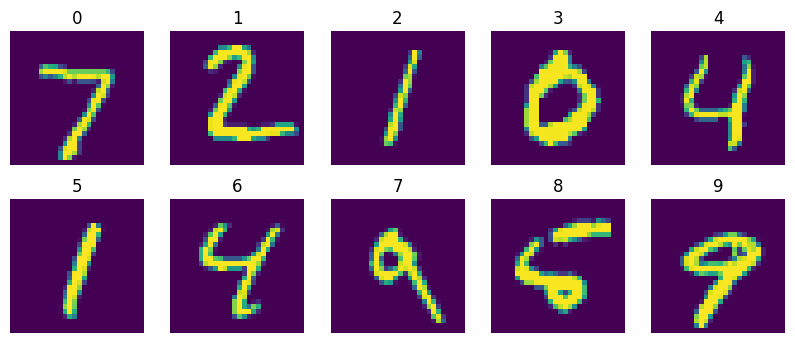

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] [7 2 1 0 4 1 4 9 5 9]
1/1 [==============================] - 0s 49ms/step
[[ -5.7619047   -1.8029714   -2.5381055   -5.5308065   -3.309586
   -5.1711593   -9.956886    14.116816    -5.017765    -2.8836086 ]
 [ -3.053905     2.313056    15.025919   -10.682653    -5.575515
   -8.735687    -3.274852    -5.9714017   -4.0815525   -3.9803882 ]
 [ -5.1225176    9.666173    -5.5962      -5.9398727   -0.600251
   -3.3525622   -1.7018471   -1.7353543   -0.0922953   -7.286375  ]
 [ 11.102982    -3.8575337   -2.573327    -6.8199916   -5.211383
   -3.4477043   -0.37833703  -3.576257     0.58016294  -3.2924936 ]
 [ -9.398824     0.93411994  -6.9892898   -8.864785    15.20682

In [21]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    plt.axis('off')
    plt.title(i)
plt.show()

print(test_labels[0:10], np.argmax(test_labels[0:10], axis=1))

y_pred = model.predict(test_images[0:10,:,:])
print(y_pred[0:10], np.argmax(y_pred, axis=1))
